[array([[False, False, False],
       [False,  True, False],
       [False, False, False]])] [array([[False, False, False],
       [False, False, False],
       [False, False, False]])]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

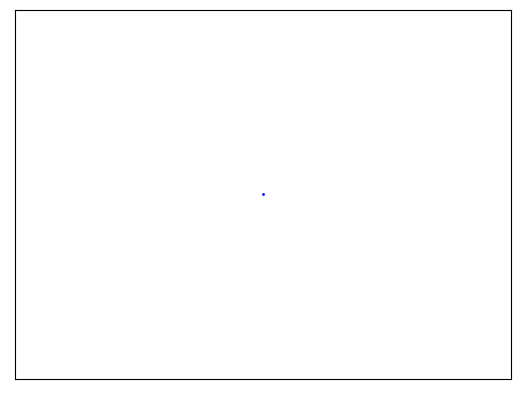

In [53]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Set up parameters
size = 100  # size of the grid
num_iterations = 10  # number of iterations
cell_locations = [(size//2, size//2)]  # start with one cell at the center
cell_colors = [0] # initial color of the cell

# Set up figure
fig, ax = plt.subplots()
ax.set_xlim([0, size])
ax.set_ylim([0, size])
ax.set_xticks([])
ax.set_yticks([])

def check_neighbors(cell_locations, cell_colors):
    new_colors = []
    colors_array = np.zeros((size, size))
    for i in range(len(colors_array)):
        for j in range(len(colors_array)):
            colors_array[i][j] = 3
    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        colors_array[x, y] = cell_colors[number]
    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        red=colors_array[x-1:x+2, y-1:y+2].count(1)
        blue=colors_array[x-1:x+2, y-1:y+2].count(0)
        if red > blue:
            new_colors.append(0)
        else:
            new_colors.append(1)
    return new_colors

# Main loop
for i in range(num_iterations):
    # Draw cells
    ccolor=['red' if x==1 else 'blue' for x in cell_colors]
    ax.scatter([x for x,y in cell_locations], [y for x,y in cell_locations], color=ccolor, s=1)

    # Update cell locations
    new_locations = []
    new_colors=[]
    for number in range(0,len(cell_locations)):
        x,y = cell_locations[number]
        if random.random() < 0.5:
            new_locations.append((x, y))
            new_colors.append(cell_colors[number])
        else:
            if random.random() < 0.5:
                new_locations.append((x+1, y))
                new_colors.append(cell_colors[number])
                new_locations.append((x-1, y))
                new_colors.append(cell_colors[number])
            else:
                new_locations.append((x, y+1))
                new_colors.append(cell_colors[number])
                new_locations.append((x, y-1))
                new_colors.append(cell_colors[number])
    cell_locations = new_locations
    cell_colors = new_colors

    cell_color = check_neighbors(cell_locations, cell_colors)

# Pause and show plot
plt.draw()
plt.pause(0.01)
ax.clear()

plt.show()

print(cell_colors)
print(cell_locations)


In [40]:
print(cell_colors)
print(cell_locations)

[0, 0, 0, 0, 0, 0]
[(51, 51), (51, 49), (50, 51), (50, 49), (49, 50), (47, 50)]
